In [12]:
import json
import matplotlib.pyplot as plt
import os
import json
import pandas as pd
import numpy as np

# Load the JSON data
stimu_name = 'pp18002'
file_path = ["D:\ppXinyue\\2022_inclusion\ppCNtown\GenerativeAgentsCN\generative_agents\\results\checkpoints", stimu_name]
json_file_path = os.path.join(file_path[0], file_path[1], 'conversation.json')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12844\3176360048.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(time_slots, rotation=45)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_12844\3176360048.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(time_slots, rotation=45)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_12844\3176360048.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(time_slots, rotation=45)


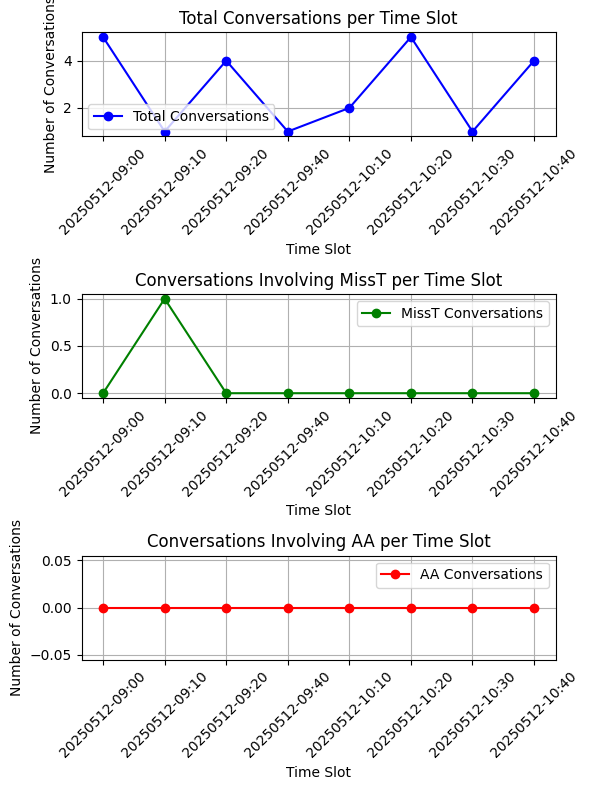

In [ ]:
with open(json_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Initialize dictionaries to store counts
total_conversations = {}
miss_t_conversations = {}
aa_conversations = {}

# Iterate through each time slot in the data
for time_slot, conversations in data.items():
    total_count = 0
    miss_t_count = 0
    aa_count = 0
    
    # Count total conversations in the time slot
    total_count = len(conversations)
    
    # Check each conversation for MissT and AA
    for conv in conversations:
        # Get the conversation participants (keys of the conversation dict)
        participants = list(conv.keys())[0].split(' -> ')
        
        # Check if MissT is in the conversation
        if 'MissT' in participants:
            miss_t_count += 1
            
        # Check if AA is in the conversation
        if 'AA' in participants:
            aa_count += 1
    
    # Store counts in respective dictionaries
    total_conversations[time_slot] = total_count
    miss_t_conversations[time_slot] = miss_t_count
    aa_conversations[time_slot] = aa_count

# Prepare data for plotting
time_slots = sorted(total_conversations.keys())
total_counts = [total_conversations[ts] for ts in time_slots]
miss_t_counts = [miss_t_conversations[ts] for ts in time_slots]
aa_counts = [aa_conversations[ts] for ts in time_slots]

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 8))

# Plot Total Conversations
ax1.plot(time_slots, total_counts, marker='o', color='b', label='Total Conversations')
ax1.set_title('Total Conversations per Time Slot')
ax1.set_xlabel('Time Slot')
ax1.set_ylabel('Number of Conversations')
ax1.grid(True)
ax1.set_xticklabels(time_slots, rotation=45)
ax1.legend()

# Plot MissT Conversations
ax2.plot(time_slots, miss_t_counts, marker='o', color='g', label='MissT Conversations')
ax2.set_title('Conversations Involving MissT per Time Slot')
ax2.set_xlabel('Time Slot')
ax2.set_ylabel('Number of Conversations')
ax2.grid(True)
ax2.set_xticklabels(time_slots, rotation=45)
ax2.legend()

# Plot AA Conversations
ax3.plot(time_slots, aa_counts, marker='o', color='r', label='AA Conversations')
ax3.set_title('Conversations Involving AA per Time Slot')
ax3.set_xlabel('Time Slot')
ax3.set_ylabel('Number of Conversations')
ax3.grid(True)
ax3.set_xticklabels(time_slots, rotation=45)
ax3.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

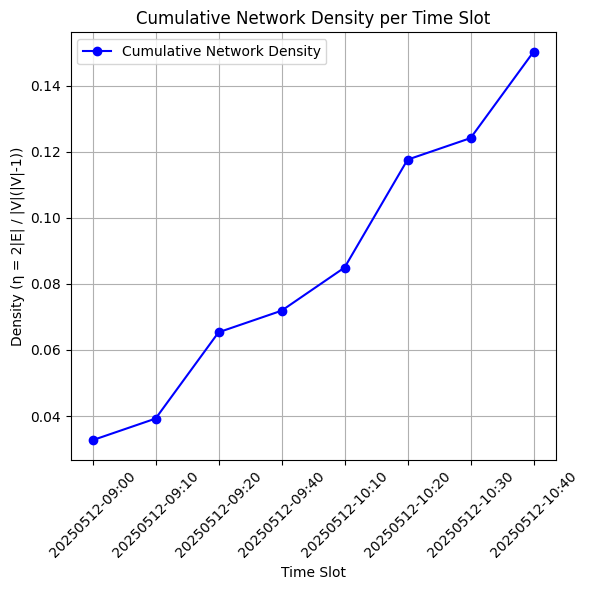

In [13]:
with open(json_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Number of nodes (|V| = 18)
V = 18
denominator = V * (V - 1)  # 18 * 17 = 306

# Initialize dictionary to store cumulative densities and set for cumulative edges
densities = {}
cumulative_edges = set()

# Sort time slots to process them chronologically
time_slots = sorted(data.keys())

# Iterate through each time slot in chronological order
for time_slot in time_slots:
    conversations = data[time_slot]
    
    # Process each conversation in the current time slot
    for conv in conversations:
        # Get the conversation participants (e.g., "DD -> CC")
        participants = list(conv.keys())[0].split(' -> ')
        # Create a tuple of participants, sorted to ensure (A, B) and (B, A) are the same edge
        edge = tuple(sorted(participants))
        cumulative_edges.add(edge)
    
    # Number of cumulative edges (|E|)
    E = len(cumulative_edges)
    
    # Calculate cumulative density: η = 2|E| / |V|(|V|-1)
    density = (2 * E) / denominator
    density = density if density > 0 else 0  # Avoid negative or invalid density
    density = round(density, 5)  # Round to 5 decimal places for clarity
    
    # Store density
    densities[time_slot] = density

# Prepare data for plotting
density_values = [densities[ts] for ts in time_slots]

# Create the plot
plt.figure(figsize=(6, 6))
plt.plot(time_slots, density_values, marker='o', color='b', label='Cumulative Network Density')
plt.title('Cumulative Network Density per Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Density (η = 2|E| / |V|(|V|-1))')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig('cumulative_network_density.png')

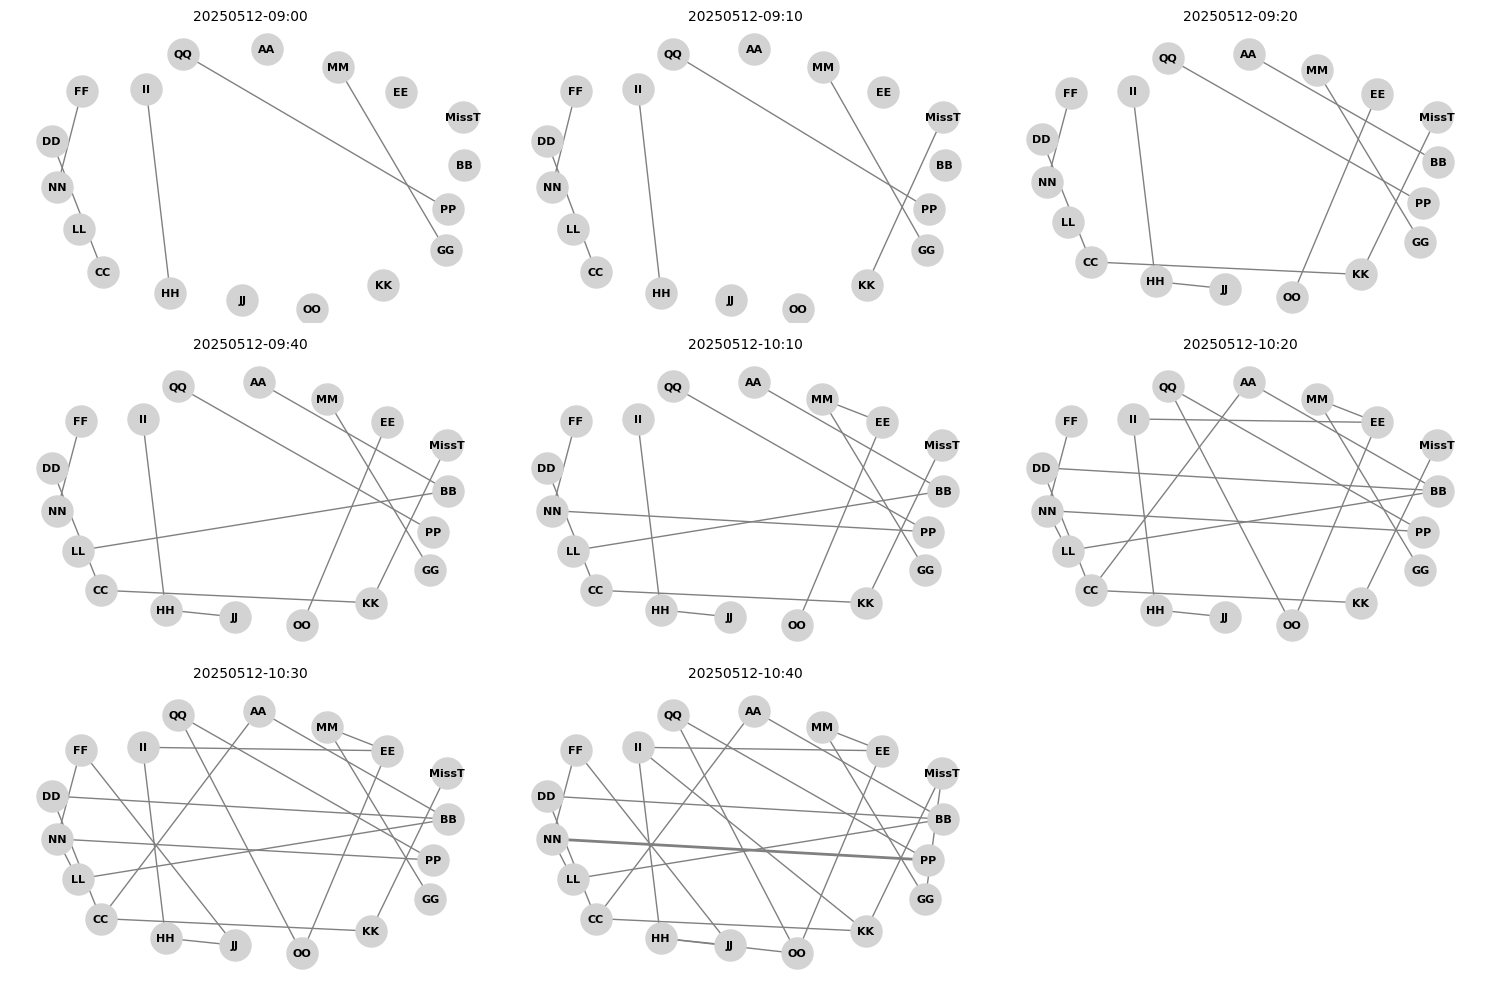

In [28]:
import json
import matplotlib.pyplot as plt
import networkx as nx
import math

with open(json_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# List of all nodes (18 characters)
nodes = ['AA', 'BB', 'CC', 'DD', 'EE', 'FF', 'GG', 'HH', 'II', 
         'JJ', 'KK', 'LL', 'MM', 'NN', 'OO', 'PP', 'QQ', 'MissT']

# Initialize dictionary to store cumulative edge weights (conversation counts)
cumulative_edge_weights = {}

# Sort time slots chronologically
time_slots = sorted(data.keys())

# Compute fixed node positions using spring layout
G_temp = nx.Graph()
G_temp.add_nodes_from(nodes)
pos = nx.spring_layout(G_temp, seed=42)  # Fixed seed for consistent positions

# Calculate grid size for subplots (3 rows, ceiling of N/3 columns)
n_time_slots = len(time_slots)
n_cols = math.ceil(n_time_slots / 3)
n_rows = 3

# Create a large figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten axes for easier iteration

# Iterate through each time slot
for idx, time_slot in enumerate(time_slots):
    conversations = data[time_slot]
    
    # Update edge weights for current time slot
    for conv in conversations:
        # Get the conversation key (e.g., "DD -> CC @ the Ville，操场，幼儿园")
        conv_key = list(conv.keys())[0]
        # Extract participant names by splitting on " -> " and taking the first part of each
        participants = [p.split('@')[0].strip() for p in conv_key.split(' -> ')]
        edge = tuple(sorted(participants))  # Undirected edge
        # Increment conversation count for this edge
        cumulative_edge_weights[edge] = cumulative_edge_weights.get(edge, 0) + 1
    
    # Create a new graph
    G = nx.Graph()
    # Add all nodes
    G.add_nodes_from(nodes)
    # Add edges with weights
    for edge, count in cumulative_edge_weights.items():
        G.add_edge(edge[0], edge[1], weight=count)
    
    # Get edge weights for thickness
    weights = [G[u][v]['weight'] * 1.0 for u, v in G.edges()]  # Scale thickness
    
    # Get the current subplot
    ax = axes[idx]
    
    # Draw the graph with fixed positions
    nx.draw(G, pos, ax=ax, with_labels=True, labels={node: node for node in nodes},
            node_color='lightgrey', node_size=500, font_size=8, font_weight='bold',
            edge_color='gray', width=weights)
    
    # Set subplot title
    ax.set_title(time_slot, fontsize=10)
    
# Hide any unused subplots
for idx in range(len(time_slots), len(axes)):
    axes[idx].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig('cumulative_network_graphs.png')

In [35]:
# 简化版本：保留健壮性判断，不使用 argparse
import json
import os
from pathlib import Path

# 直接指定参数
BASE_PATH = r"D:\\ppXinyue\\2022_inclusion\\ppCNtown\\GenerativeAgentsCN\\generative_agents\\results\\checkpoints"
STIMU_NAME = "pp18002"
OUTPUT_DIR = "output"
TOP_POIGNANT_JSON = "top_poignant_nodes.json"

top_poignant_nodes = {}

def convert_json_to_text_simple(json_file_path, output_path, character):
    try:
        os.makedirs(os.path.dirname(output_path), exist_ok=True)

        with open(json_file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)

        if 'docstore/data' not in data or 'docstore/metadata' not in data:
            print(f"Error: {json_file_path} missing 'docstore/data' or 'docstore/metadata'")
            return

        lines = []

        docstore_data = data['docstore/data']
        docstore_metadata = data['docstore/metadata']

        if not docstore_data:
            print(f"Warning: {json_file_path} has no nodes in 'docstore/data'")
            lines.append("No nodes found in this file")

        max_poignancy = float('-inf')
        top_node = None

        for node_id in sorted(docstore_data):
            node_data = docstore_data[node_id].get('__data__', {})
            metadata = node_data.get('metadata', {})
            text = node_data.get('text', '')
            doc_hash = docstore_metadata.get(node_id, {}).get('doc_hash', '')

            # 记录 poignancy 最高的节点
            try:
                poignancy = float(metadata.get('poignancy', '-inf'))
                if poignancy > max_poignancy:
                    max_poignancy = poignancy
                    top_node = {
                        "character": character,
                        "node_id": node_id,
                        "poignancy": poignancy,
                        "metadata": metadata,
                        "text": text,
                        "doc_hash": doc_hash
                    }
            except ValueError:
                pass

            lines.append(f"===== Node: {node_id} =====")
            lines.append(f"Type: {metadata.get('node_type', '')}")
            lines.append(f"Subject: {metadata.get('subject', '')}")
            lines.append(f"Predicate: {metadata.get('predicate', '')}")
            lines.append(f"Object: {metadata.get('object', '')}")
            lines.append(f"Address: {metadata.get('address', '')}")
            lines.append(f"Poignancy: {metadata.get('poignancy', '')}")
            lines.append(f"Create: {metadata.get('create', '')}")
            lines.append(f"Expire: {metadata.get('expire', '')}")
            lines.append(f"Access: {metadata.get('access', '')}")
            lines.append(f"Doc Hash: {doc_hash}")
            lines.append("Text:")
            lines.append(text)
            lines.append("")

        if top_node:
            top_poignant_nodes[character] = top_node

        with open(output_path, 'w', encoding='utf-8') as f:
            f.write('\n'.join(lines))

        print(f"Converted: {json_file_path} -> {output_path}")

    except Exception as e:
        print(f"Error processing {json_file_path}: {e}")

def batch_process():
    characters = ['AA', 'BB', 'CC', 'DD', 'EE', 'FF', 'GG', 'HH', 'II', 
                  'JJ', 'KK', 'LL', 'MM', 'NN', 'OO', 'PP', 'QQ', 'MissT']

    stimu_path = Path(BASE_PATH) / STIMU_NAME / 'storage'
    if not stimu_path.exists():
        print(f"Error: Directory {stimu_path} does not exist")
        return

    for char in characters:
        json_file = stimu_path / char / 'associate' / 'docstore.json'
        output_file = Path(OUTPUT_DIR) / STIMU_NAME / f"{char}.txt"
        convert_json_to_text_simple(json_file, output_file, char)

    # 保存每个人 poignancy 最高的节点
    top_output_file = Path(OUTPUT_DIR) / STIMU_NAME / TOP_POIGNANT_JSON
    os.makedirs(top_output_file.parent, exist_ok=True)
    with open(top_output_file, 'w', encoding='utf-8') as f:
        json.dump(top_poignant_nodes, f, indent=2, ensure_ascii=False)
    print(f"Saved top poignancy nodes to {top_output_file}")

def main():
    batch_process()

if __name__ == '__main__':
    main()

Converted: D:\ppXinyue\2022_inclusion\ppCNtown\GenerativeAgentsCN\generative_agents\results\checkpoints\pp18002\storage\AA\associate\docstore.json -> output\pp18002\AA.txt
Converted: D:\ppXinyue\2022_inclusion\ppCNtown\GenerativeAgentsCN\generative_agents\results\checkpoints\pp18002\storage\BB\associate\docstore.json -> output\pp18002\BB.txt
Converted: D:\ppXinyue\2022_inclusion\ppCNtown\GenerativeAgentsCN\generative_agents\results\checkpoints\pp18002\storage\CC\associate\docstore.json -> output\pp18002\CC.txt
Converted: D:\ppXinyue\2022_inclusion\ppCNtown\GenerativeAgentsCN\generative_agents\results\checkpoints\pp18002\storage\DD\associate\docstore.json -> output\pp18002\DD.txt
Converted: D:\ppXinyue\2022_inclusion\ppCNtown\GenerativeAgentsCN\generative_agents\results\checkpoints\pp18002\storage\EE\associate\docstore.json -> output\pp18002\EE.txt
Converted: D:\ppXinyue\2022_inclusion\ppCNtown\GenerativeAgentsCN\generative_agents\results\checkpoints\pp18002\storage\FF\associate\docstor

In [36]:
import json
import csv
import random
from pathlib import Path

# Load the JSON data
stimu_name = 'pp18002'
file_path = ["D:\ppXinyue\\2022_inclusion\ppCNtown\GenerativeAgentsCN\generative_agents\\results\checkpoints", stimu_name]
json_file_path = os.path.join(file_path[0], file_path[1], 'conversation.json')
out_file_path = os.path.join(file_path[0], file_path[1], 'sample_sentences.csv')


# 参数配置
INPUT_JSON_PATH = json_file_path  # 替换为你的输入 JSON 文件路径
OUTPUT_CSV_PATH = out_file_path  # 替换为你的输出 CSV 文件路径
SAMPLE_SIZE = 10

def extract_all_sentences(json_data):
    """从嵌套的对话结构中提取所有句子和说话人"""
    sentences = []
    for timestamp, conversation_list in json_data.items():
        for convo in conversation_list:
            for scene_desc, turns in convo.items():
                for speaker, utterance in turns:
                    if utterance.strip():
                        sentences.append((speaker, utterance.strip()))
    return sentences

def sample_and_save_sentences(input_json_path, output_csv_path, n=SAMPLE_SIZE):
    try:
        with open(input_json_path, 'r', encoding='utf-8') as f:
            data = json.load(f)

        all_sentences = extract_all_sentences(data)

        if len(all_sentences) == 0:
            print("No sentences found in the input JSON file.")
            return

        sampled = random.sample(all_sentences, min(n, len(all_sentences)))

        with open(output_csv_path, 'w', encoding='utf-8', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(["Character", "Sentence"])
            writer.writerows(sampled)

        print(f"Sampled {len(sampled)} sentences written to {output_csv_path}")

    except Exception as e:
        print(f"Error: {e}")

if __name__ == '__main__':
    sample_and_save_sentences(INPUT_JSON_PATH, OUTPUT_CSV_PATH)

Sampled 10 sentences written to D:\ppXinyue\2022_inclusion\ppCNtown\GenerativeAgentsCN\generative_agents\results\checkpoints\pp18002\sample_sentences.csv


In [ ]:
import json
import csv
import random
from pathlib import Path

# Load the JSON data
stimu_name = 'pp18002'
file_path = ["D:\ppXinyue\\2022_inclusion\ppCNtown\GenerativeAgentsCN\generative_agents\\results\checkpoints", stimu_name]
json_file_path = os.path.join(file_path[0], file_path[1], 'conversation.json')
out_file_path = os.path.join(file_path[0], file_path[1], 'sample_AA_sentences.csv')


# 参数配置
INPUT_JSON_PATH = json_file_path  # 替换为你的输入 JSON 文件路径
OUTPUT_CSV_PATH = out_file_path  # 替换为你的输出 CSV 文件路径
SAMPLE_SIZE = 10


def sample_and_save_sentences(json_path, csv_path, n_aa=5, n_other=5):
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    all_sentences = []
    aa_sentences = []
    other_sentences = []

    for time_block in data.values():
        for interaction in time_block:
            for dialog in interaction.values():
                for speaker, sentence in dialog:
                    if sentence.strip():
                        if speaker == 'AA':
                            aa_sentences.append((speaker, sentence))
                        else:
                            other_sentences.append((speaker, sentence))

    sampled_aa = random.sample(aa_sentences, min(n_aa, len(aa_sentences)))
    sampled_others = random.sample(other_sentences, min(n_other, len(other_sentences)))
    sampled = sampled_aa + sampled_others
    random.shuffle(sampled)

    with open(csv_path, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Character', 'Sentence'])
        writer.writerows(sampled)

    print(f"Saved {len(sampled)} sampled sentences to {csv_path}")

if __name__ == '__main__':
    sample_and_save_sentences(INPUT_JSON_PATH, OUTPUT_CSV_PATH)


Saved 7 sampled sentences to D:\ppXinyue\2022_inclusion\ppCNtown\GenerativeAgentsCN\generative_agents\results\checkpoints\pp18002\sample_AA_sentences.csv


: 